In [5]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

In [6]:
def vectorize_sequenses(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = vectorize_sequenses(train_data)
x_test = vectorize_sequenses(test_data)

y_train = np.asarray(train_labels).astype('float32').reshape((-1,1))
y_test = np.asarray(test_labels).astype('float32').reshape((-1,1))

In [49]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
patial_y_train = y_train[10000:]

In [52]:
history = model.fit(partial_x_train,
                    patial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 39ms/step - loss: 0.5972 - accuracy: 0.6726 - val_loss: 0.5121 - val_accuracy: 0.8330
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.4256 - accuracy: 0.8791 - val_loss: 0.3888 - val_accuracy: 0.8778
Epoch 3/4
30/30 [==============================] - 1s 19ms/step - loss: 0.3129 - accuracy: 0.9165 - val_loss: 0.3255 - val_accuracy: 0.8878
Epoch 4/4
30/30 [==============================] - 1s 19ms/step - loss: 0.2476 - accuracy: 0.9299 - val_loss: 0.2980 - val_accuracy: 0.8874


In [53]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

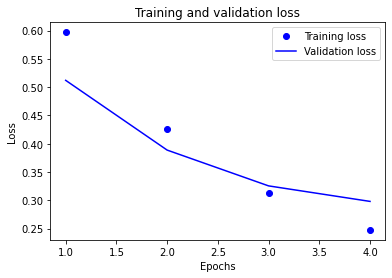

In [54]:
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

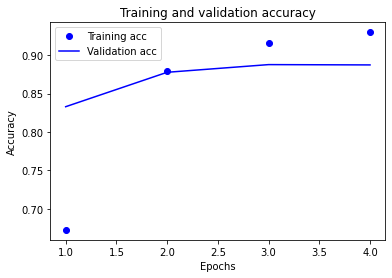

In [55]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show